# Sample

This is just a sample notebook

## Sample Sub Section

In [1]:
print(3+4)

7


**Issues:**  

The ```subsubsections``` are not numbered. At this time, it looks like problem is at least outside the scope of ipython as even raw tex file shows this problem. Try limiting your sections to 2 levels only. That is till ```##``` not beyond to be on safe side.

## this subsection is numbered
### this subsubsection is not numbered

## Using Latex Equations

Latex equations cause few issues because Mathjax used by ipython is not fully latex compliant. 

**Issues:**

1. Mathjax is lineant on not using brackets to cover multi digit subscripts while latex is not. ```\mu_\widehat{p}``` will be converted properly in notebook while gives error in converted tex file. Always wrap subscripts fully. For eg, ```\mu_{\widehat{p}}``` will work in tex as well. 
2. If you use ```begin{equation}```, need not embrace further with ```$$``` which will only create error in converted tex. 
3. ```begin{equation}``` does not allow multi line, so use ```begin{aligned}``` inside.
4. Double slash for new line will not work unless the set of equations are wrapped within ```\begin{align}```

References: [1](https://github.com/jupyter/nbconvert/issues/881)
    
**Demo:**

Set of latex equations which successfully works in converted tex as well.

Raw:
```
$$
\color{blue}{
\begin{aligned}
    \text{Random Variable} \ \ \widehat{p} =  \overline{\widehat{Y}} \\
    \mu_{\widehat{p}} = \mu{\overline{\widehat{Y}}} \\
    \sigma_{\widehat{p}} = \sigma(\overline{\widehat{Y}})
\end{aligned}
}
$$
```

Output:
$$
\color{blue}{
\begin{aligned}
    \text{Random Variable} \ \ \widehat{p} =  \overline{\widehat{Y}} \\
    \mu_{\widehat{p}} = \mu{\overline{\widehat{Y}}} \\
    \sigma_{\widehat{p}} = \sigma(\overline{\widehat{Y}})
\end{aligned}
}
$$

Raw:
```
$$
\begin{equation}
\color{blue}{
\begin{aligned}
    \text{Random Variable} \ \ \widehat{p} =  \overline{\widehat{Y}} \nonumber \\ \\
    \mu_{\widehat{p}} = \mu{\overline{\widehat{Y}}} \nonumber \\ \\
    \sigma_{\widehat{p}} = \sigma(\overline{\widehat{Y}}) \nonumber 
\end{aligned}}
\end{equation}
$$
```

Output (note even if I give nonumber, equation is numbered!): 
\begin{equation}
\color{blue}{
\begin{aligned}
    \text{Random Variable} \ \ \widehat{p} =  \overline{\widehat{Y}}  \\ \\
    \mu_{\widehat{p}} = \mu{\overline{\widehat{Y}}}  \\ \\
    \sigma_{\widehat{p}} = \sigma(\overline{\widehat{Y}}) 
\end{aligned}}
\end{equation}

## Using Attachments

**Issue:**  
Using a ```backslash and a space and then a blank line``` to avoid attachments becoming floats and placed out of section. This is to be done after every attachment. Else they simply float around. This is a latex issue. Do not worry, they will not appear in latex though they appear here. If nbconvert did not use figure and instead only includegraphis this issue could have been avoided. Got this hint from [here](https://tex.stackexchange.com/questions/101725/latex-figures-appear-before-text-in-pandoc-markdown/101726)

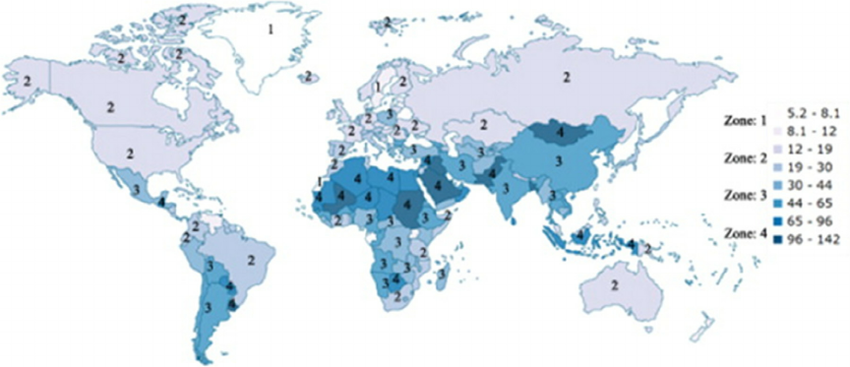
\ 


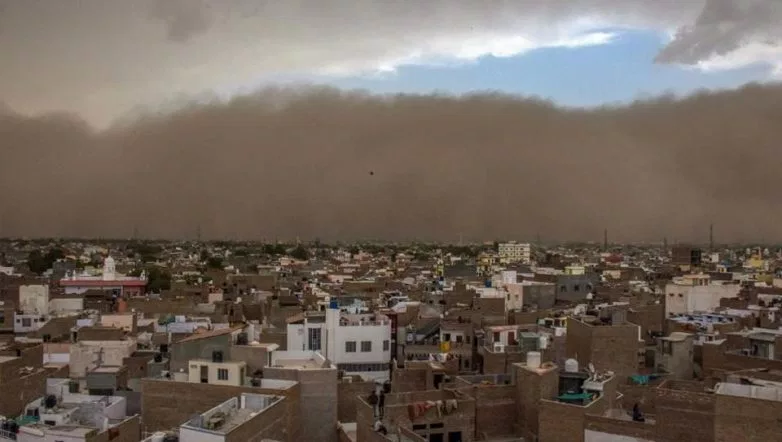
\ 


## Using Code

Code wrapping has issue both in input and output..

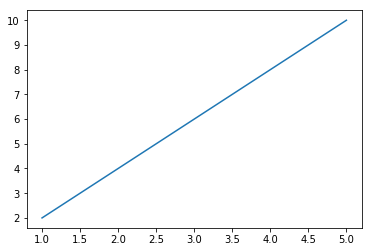


Lorem ipsum dolor sit amet, consectetur adipiscing elit. Suspendisse tincidunt vel arcu at rhoncus. Duis efficitur, 
ligula vitae tincidunt laoreet, felis eros ultricies arcu, ac ullamcorper mi felis non velit. In eu lorem vel lacus 



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# testing wrapping
#Lorem ipsum dolor sit amet, consectetur adipiscing elit. Suspendisse tincidunt vel arcu at rhoncus. Duis efficitur, 
#ligula vitae tincidunt laoreet, felis eros ultricies arcu, ac ullamcorper mi felis non velit. In eu lorem vel lacus 


test_str = """
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Suspendisse tincidunt vel arcu at rhoncus. Duis efficitur, 
ligula vitae tincidunt laoreet, felis eros ultricies arcu, ac ullamcorper mi felis non velit. In eu lorem vel lacus 
"""

x = [1,2,3,4,5]
y = [2,4,6,8,10]
plt.plot(x,y)
plt.show()

print(test_str)

## Cross Reference

Sometimes you would want to refer an equation or something in another tex file from here. This is how to do it. 

**Issue:** We need to do this in raw cell as cross references are not realized at nbconvert level. Also using this externaldocument would compile the entire main.tex file currently instead of only the referenced file. This should be investigated why. Its a nuisance for now. Also note the line breaks explicitly given instead of double space or latex break because these are raw cells, so a line break also should be literally given as above (would be clear when you view this document in notebook)

## Tikz from ipython

It is possible to compile tikz also in ipython thanks to [tikzmagic](https://github.com/mkrphys/ipython-tikzmagic) however the image that appears in normal size in notebook gets too shrinked in latex, apparantly because, image though good enough in resolution is, small in size (few cms). Ref [1](https://tex.stackexchange.com/questions/452720/weird-image-scaling-in-tex), [2](https://github.com/mkrphys/ipython-tikzmagic/issues/27). Current workaround is to maintain a minimum size for the image. This is done via nbconvert jinja template using adjustbox package. 

If you have multiple code cells as below, insert a markdown cell intermediately, add a backward slash and a blank line below that. If not there would be an error while compiling resultant tex. Do not worry, these markdown cell contents will not be visible in tex and thus final pdf. 

In [1]:
%load_ext tikzmagic

\


In [2]:
preamble = '''
    \pgfmathdeclarefunction{gauss}{3}{%
      \pgfmathparse{1/(#3*sqrt(2*pi))*exp(-((#1-#2)^2)/(2*#3^2))}%
    }
'''

\


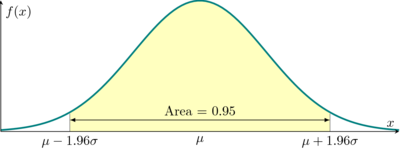

In [3]:
%%tikz -p pgfplots -x $preamble
% had to be this size to have a normal size in latex 
    \begin{axis}[
        no markers, 
        domain=0:6, 
        samples=100,
        ymin=0,
        axis lines*=left, 
        xlabel=$x$,
        ylabel=$f(x)$,
        height=5cm, 
        width=12cm,
        xtick=\empty, 
        ytick=\empty,
        enlargelimits=false, 
        clip=false, 
        axis on top,
        grid = major,
        axis lines = middle
      ]
    
    \def\mean{3}
    \def\sd{1}
    \def\cilow{\mean - 1.96*\sd}
    \def\cihigh{\mean + 1.96*\sd}
    \addplot [draw=none, fill=yellow!25, domain=\cilow:\cihigh] {gauss(x, \mean, \sd)} \closedcycle;
    \addplot [very thick,cyan!50!black] {gauss(x, 3, 1)};

    \pgfmathsetmacro\valueA{gauss(1,\mean,\sd)}
    \draw [gray] (axis cs:\cilow,0) -- (axis cs:\cilow,\valueA) (axis cs:\cihigh,0) -- (axis cs:\cihigh,\valueA);
    \draw [yshift=0.3cm, latex-latex](axis cs:\cilow, 0) -- node [above] {Area = $0.95$} (axis cs:\cihigh, 0);   

    \node[below] at (axis cs:\cilow, 0)  {$\mu - 1.96\sigma$}; 
    \node[below] at (axis cs:\mean, 0)  {$\mu$}; 
    \node[below] at (axis cs:\cihigh, 0)  {$\mu + 1.96\sigma$}; 
    
\end{axis}

## Hide Code cells

Also now added the ability to hide input prompts of the code cells. For eg, the code responsible for below matplotlib figure is hidden in latex but will appear in notebook. This is done by adding <b>to_remove</b> tag to the code cell, and later removing it via nbconvert's jinja template process. 

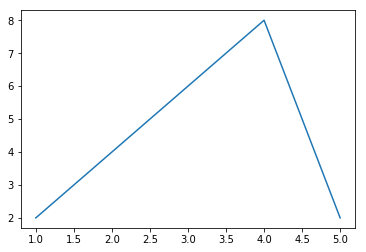

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

X = [1,2,3,4,5]
Y = [2,4,6,8,2]

plt.plot(X,Y)
plt.show()